<a href="https://colab.research.google.com/github/Syaroful/syaroful-ml-semester-5/blob/main/11%20-%20Convlutional%20Neural%20Network/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhamad Syaroful Anam | 2141720108 | TI - 3G

## Tugas 1

Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

### **Import Library**


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [10]:
# Load CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

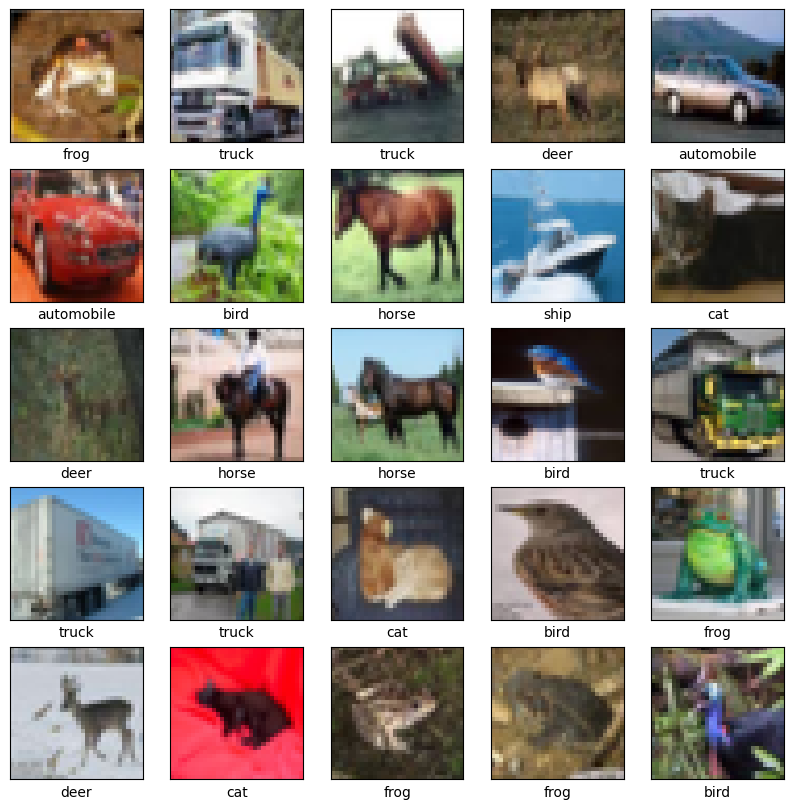

In [11]:
# Visualize image data from CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Normalize Data**

In [12]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### **Building Model and Compile**

In [13]:
# initiate model
model = Sequential()

In [14]:
# add layer to model
# First Conv layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Second Conv layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Third, fourth, fifth convolution layer
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Fully Connected layers
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [15]:
# compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Fitting Mobile**

In [16]:
history = model.fit(train_images, train_labels, epochs=20,validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 45s 21ms/step - loss: 2.5583 - accuracy: 0.2972 - val_loss: 1.8608 - val_accuracy: 0.4831
Epoch 2/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7738 - accuracy: 0.4964 - val_loss: 1.5367 - val_accuracy: 0.5830
Epoch 3/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4816 - accuracy: 0.5866 - val_loss: 1.3378 - val_accuracy: 0.6350
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2936 - accuracy: 0.6437 - val_loss: 1.1588 - val_accuracy: 0.6891
Epoch 5/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1616 - accuracy: 0.6856 - val_loss: 1.0336 - val_accuracy: 0.7312
Epoch 6/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0636 - accuracy: 0.7174 - val_loss: 0.9874 - val_accuracy: 0.7363
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9836 - accuracy: 0.7423 - val_loss: 0.9344 -

### **Evaluate Model**

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

313/313 - 2s - loss: 0.7172 - accuracy: 0.8397 - 2s/epoch - 6ms/step

Test accuracy: 83.97%


313/313 - 2s - loss: 0.7172 - accuracy: 0.8397 - 2s/epoch - 5ms/step


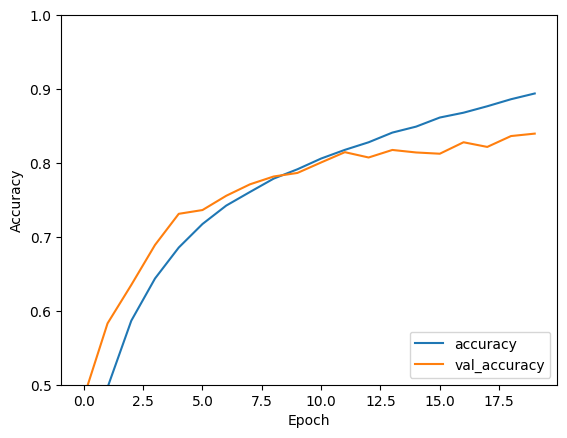

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Tugas 2

Membuat model CNN untuk klasifikasi dataset MNIST.

### **Import Library**

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

In [20]:
# get MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


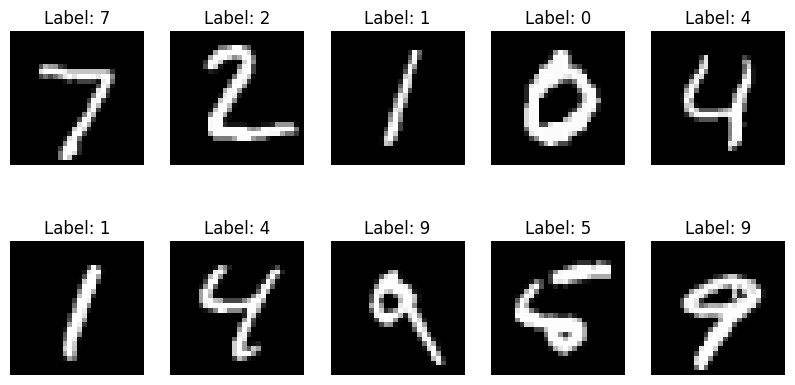

In [21]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.show()

In [22]:
# Check for nan values
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())

False
False


In [23]:
# Normalization and reshaping
input_shape = (28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test / 255.0

In [24]:
# Label Encoding (one hot encoding)

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

### **Building model CNN**

In [25]:
# Define model CNN
batch = 64
num_class = 10
epochs = 10


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [27]:
# Menambahkan custom callback
# Berguna untuk menghentikan training data ketika akurasi telah tercapai 90% persen saat training
# Meski training masih belum selesai hingga epoch yang telah ditentukan, namun jika akurasi telah memenuhi target training akan dihentikan
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995):
      print('akurasi telah tercapai 99.5%, training dihentikan...')
      self.model.stop_training = True

callbacks = customCallback()


In [28]:
# Fitting Model
history = model.fit(X_train, y_train,
                    batch_size = batch,
                    epochs = epochs,
                    validation_split = 0.1,
                    callbacks = [callbacks]
                    )

Epoch 1/10
844/844 [==============================] - 13s 13ms/step - loss: 0.2237 - acc: 0.9310 - val_loss: 0.0513 - val_acc: 0.9837
Epoch 2/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0767 - acc: 0.9777 - val_loss: 0.0322 - val_acc: 0.9913
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0577 - acc: 0.9838 - val_loss: 0.0317 - val_acc: 0.9915
Epoch 4/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0523 - acc: 0.9854 - val_loss: 0.0323 - val_acc: 0.9915
Epoch 5/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0451 - acc: 0.9872 - val_loss: 0.0303 - val_acc: 0.9917
Epoch 6/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0430 - acc: 0.9879 - val_loss: 0.0397 - val_acc: 0.9917
Epoch 7/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0430 - acc: 0.9890 - val_loss: 0.0280 - val_acc: 0.9935
Epoch 8/10
844/844 [==============================] - 7s 8ms/step - loss: 

### **Evaluate Model**

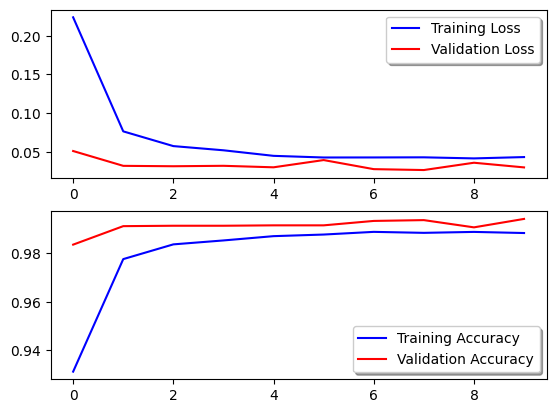

In [29]:
# Loss and Accuracy
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [30]:
# Prediction
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0207 - acc: 0.9940


In [31]:
# Confussion Matrix
# predict from testing dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_class = np.argmax(y_pred,axis = 1)
# Convert testing observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_class)

313/313 [==============================] - 1s 4ms/step


<Axes: >

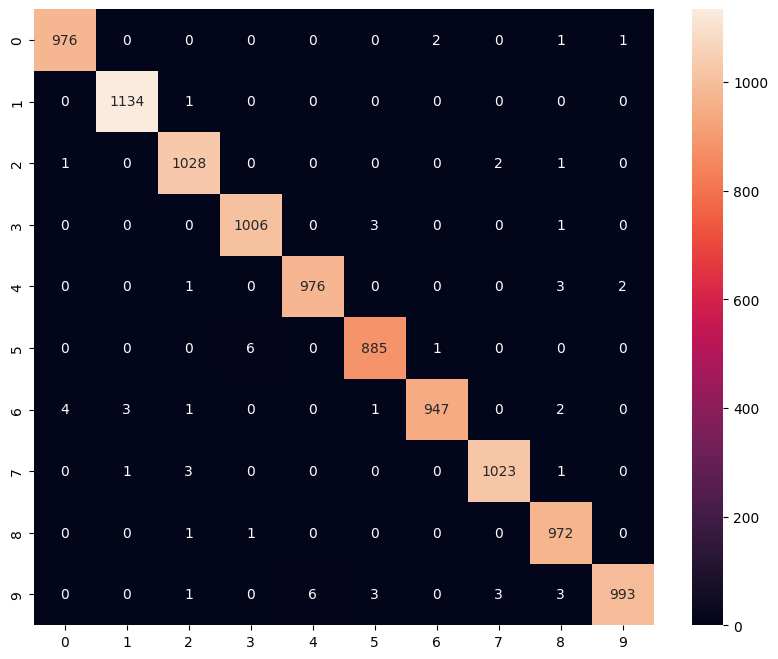

In [32]:
# visualisaztion confussion matrix with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

1/1 [==============================] - 0s 26ms/step


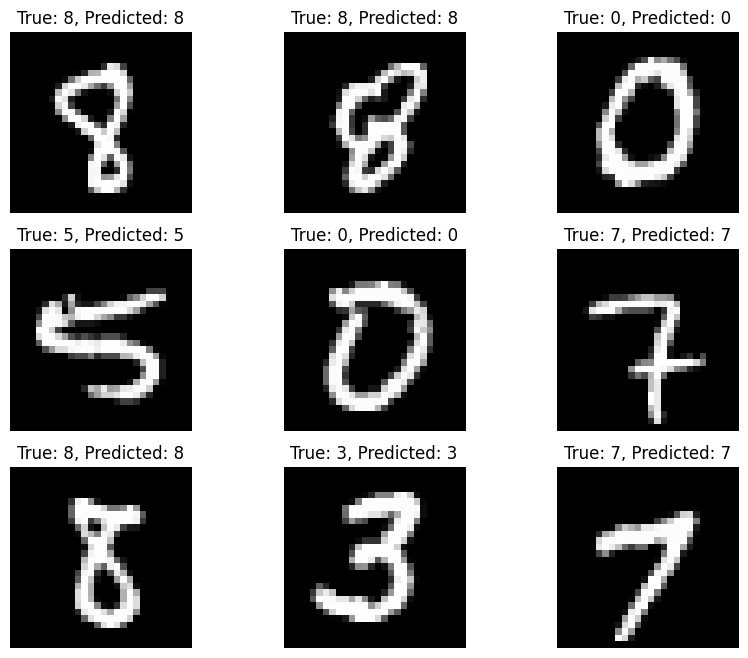

In [33]:
# testing to prediction image

# Choose 9 random indices from the test set
indices = np.random.choice(len(X_test), size=9, replace=False)

# Plot the 9 images
plt.figure(figsize=(10, 8))
for i, index in enumerate(indices, 1):
    plt.subplot(3, 3, i)

    # Get the image and true label
    test_image = X_test[index]
    true_label = np.argmax(y_test[index])

    # Reshape the image to (1, 28, 28, 1) to match the input shape of the model
    test_image = np.expand_dims(test_image, axis=0)

    # Get the model prediction
    prediction = model.predict(test_image)
    predicted_label = np.argmax(prediction)

    # Display the true label, predicted label, and the image
    plt.imshow(test_image[0, :, :, 0], cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')

plt.show()
